In [3]:
import tune_measure as tm
import numpy as np
import matplotlib.pyplot as plt
#%config Completer.use_jedi = False

# Searching relations between precision and coupling

In [ ]:
KsL_list = -np.linspace(0,0.05, num=10)
# reserving memory space
coupling_list = np.zeros(KsL_list.shape)
error_dft_tune1 = np.zeros(KsL_list.shape)
error_dft_tune2 = error_dft_tune1.copy()
error_naff_tune1 = np.zeros(KsL_list.shape)
error_naff_tune2 = error_naff_tune1.copy()
tune1_list = coupling_list.copy()
tune2_list = coupling_list.copy()

offset = np.array(
    [[2e-6],
    [1e-6],
    [2e-6],
    [1e-6],
    [0],
    [0]]
    )

for i in range(len(KsL_list)):
    
    obj = tm.BPMeasure()
    
    obj.create_booster(KsL=KsL_list[i])
    coupling_list[i] = obj._coupling_coef
    tune1, tune2 = obj._eqparams.tune1, obj._eqparams.tune2
    tune1_list[i], tune2_list[i] = tune1, tune2
    
    obj.create_initial_bunch(n_part=1000, offset=offset)
    x_m, y_m = obj.tracking_and_get_bpmdata(N_turns=40)    
    
    dft_tune1, dft_tune2 = tm.tune_by_DFT(x_m, y_m)
    
    naff_tune1, naff_tune2 = tm.tune_by_NAFF(x_m, y_m)
    #stores only decimal part 
    naff_tune1, naff_tune2 = naff_tune1%1, naff_tune2%1

    error_dft_tune1[i] = np.abs(dft_tune1 - tune1)
    error_dft_tune2[i] = np.abs(dft_tune2 - tune2)

    error_naff_tune1[i] = np.abs(naff_tune1 - tune1)
    error_naff_tune2[i] = np.abs(naff_tune2 - tune2)
    print("step",i, obj._coupling_coef , "Done")

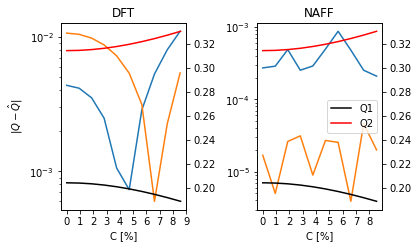

In [4]:
fig, ax = plt.subplots(1, 2, sharex = True, sharey = False)
fig.tight_layout(pad=4.0)

ax[0].semilogy(coupling_list*1e2, error_dft_tune1, label="Q1")
ax[0].semilogy(coupling_list*1e2, error_dft_tune2, label="Q2")
ax[1].semilogy(coupling_list*1e2, error_naff_tune1, label="Q1" )
ax[1].semilogy(coupling_list*1e2, error_naff_tune2, label="Q2")

qdft_ax = ax[0].twinx()
qnaff_ax = ax[1].twinx()

qdft_ax.plot(coupling_list*1e2, tune1_list, label='Q1', c='k')
qdft_ax.plot(coupling_list*1e2, tune2_list, label='Q2', c='r')

qnaff_ax.plot(coupling_list*1e2, tune1_list, label='Q1', c='k')
qnaff_ax.plot(coupling_list*1e2, tune2_list, label='Q2', c='r')

ax[0].set_xticks((coupling_list*100).round())
ax[0].set_title("DFT")
ax[1].set_title("NAFF")
ax[0].set_xlabel("C [%]")
ax[1].set_xlabel('C [%]')
ax[0].set_ylabel("$|Q - \hat{Q}|$")
plt.legend()

# Analyzing the variation of precision with turns

In [4]:
N_list = np.arange(20,200,20) #Number of turns list
KsL_list = -np.linspace(0,0.05,num=4)

coupling_list = np.zeros([KsL_list.size, N_list.size])
error_naff_tune1 = coupling_list.copy()
error_naff_tune2 = coupling_list.copy()
tune1_list = coupling_list.copy()
tune2_list = coupling_list.copy()

offset = np.array(
    [[2e-6],
    [1e-6],
    [2e-6],
    [1e-6],
    [0],
    [0]]
    )

for i in range(len(KsL_list)):
    for j in range(len(N_list)):
        
        obj = tm.BPMeasure()
    
        obj.create_booster(KsL=KsL_list[i])
        coupling_list[i][j] = obj._coupling_coef
        tune1, tune2 = obj._eqparams.tune1, obj._eqparams.tune2
        tune1_list[i][j], tune2_list[i][j] = tune1, tune2

        obj.create_initial_bunch(n_part=1000, offset=offset)
        x_m, y_m = obj.tracking_and_get_bpmdata(N_turns=N_list[j])    

        #dft_tune1, dft_tune2 = tm.tune_by_DFT(x_m, y_m)

        naff_tune1, naff_tune2 = tm.tune_by_NAFF(x_m, y_m, window_param=1)
        #stores only decimal part 
        naff_tune1, naff_tune2 = naff_tune1%1, naff_tune2%1

        error_naff_tune1[i][j] = np.abs(naff_tune1 - tune1)
        error_naff_tune2[i][j] = np.abs(naff_tune2 - tune2)
        print("step",i,',',j, obj._coupling_coef , "Done")

step 0 , 0 0.0 Done
step 0 , 1 0.0 Done
step 0 , 2 0.0 Done
step 0 , 3 0.0 Done
step 0 , 4 0.0 Done
step 0 , 5 0.0 Done
step 0 , 6 0.0 Done
step 0 , 7 0.0 Done
step 0 , 8 0.0 Done
step 1 , 0 0.028152256498034267 Done
step 1 , 1 0.028152256498034267 Done
step 1 , 2 0.028152256498034267 Done
step 1 , 3 0.028152256498034267 Done
step 1 , 4 0.028152256498034267 Done
step 1 , 5 0.028152256498034267 Done
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
step 1 , 6 0.028152256498034267 Done
step 1 , 7 0.028152256498034267 Done
step 1 , 8 0.028152256498034267 Done
step 2 , 0 0.05653013963046971 Done
step 2 , 1 0.05653013963046971 Done
step 2 , 2 0.05653013963046971 Done
step 2 , 3 0.05653013963046971 Done
step 2 , 4 0.05653013963046971 Done
step 2 , 5 0.05653013963046971 Done
step 2 , 6 0.05653013963046971 Done
step 2 , 7 0.05653013963046971 Done
step 2 , 8 0.05653013963046971 Done
step 3 , 0 0.08537639751361889 Done
step 3 , 1 0.08537639751361889 Done
step 3 , 2 0.085376

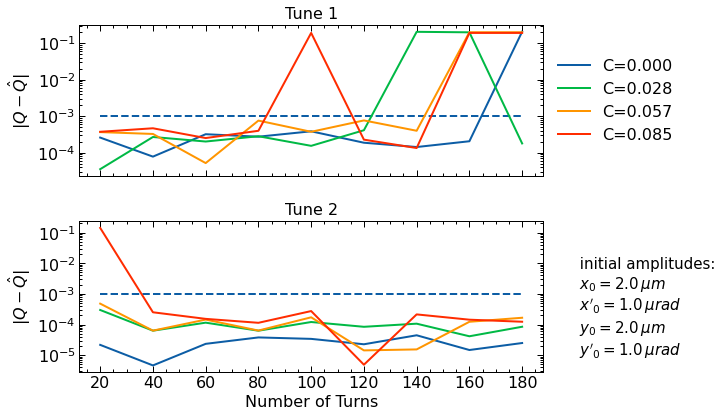

In [39]:
with plt.style.context(['science', 'notebook']):
    fig, ax = plt.subplots(2,1, sharex=True)
    fig.tight_layout(pad=3.0)

    ax[0].set_title("Tune 1")
    ax[0].set_ylabel("$|Q - \hat{Q}|$")
    ax[0].hlines(1e-3,20,180, linestyles='dashed')
    for n in range(len(KsL_list)):
        ax[0].semilogy(N_list, error_naff_tune1[n,:], label="C={:.3f}".format(coupling_list[n][0]))
        
    ax[1].set_title("Tune 2")
    ax[1].set_ylabel("$|Q - \hat{Q}|$")
    ax[1].set_xlabel("Number of Turns")
    ax[1].hlines(1e-3,20,180, linestyles='dashed')

    for n in range(len(KsL_list)):
        ax[1].semilogy(N_list, error_naff_tune2[n,:], label="C={:.3f}".format(coupling_list[n][0]))
    ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1].text(x=200, y=0.00001, s="\n initial amplitudes: \n $x_0 = {} \, \mu m$"
                                    "\n $x'_0 = {} \, \mu rad$"
                                    "\n $y_0 = {} \, \mu m$"
                                    "\n $y'_0 = {} \, \mu rad$".format(offset[0][0]*1e6, offset[1][0]*1e6, offset[2][0]*1e6, offset[3][0]*1e6), fontsize = 15)


In [34]:
relative_erro = error_naff_tune1/tune1_list.mean(axis=1).reshape([4,1])


array([[1.27309259e-03, 3.84142580e-04, 1.57484784e-03, 1.34761340e-03,
        1.89064914e-03, 9.21533383e-04, 7.02736138e-04, 1.01096334e-03,
        1.00000000e+00],
       [1.75966471e-04, 1.33418854e-03, 1.00317367e-03, 1.39884042e-03,
        7.64248217e-04, 2.04127344e-03, 1.00000000e+00, 9.69085395e-01,
        8.89046663e-04],
       [1.86455850e-03, 1.65946037e-03, 2.65215723e-04, 3.84572345e-03,
        1.89985211e-03, 3.88709843e-03, 2.02851820e-03, 1.00000000e+00,
        1.00000000e+00],
       [1.98330844e-03, 2.47413542e-03, 1.33700900e-03, 2.11145968e-03,
        1.00000000e+00, 1.20902876e-03, 7.13432034e-04, 1.00000000e+00,
        1.00000000e+00]])

Text(0, 0.5, '$\\epsilon$ [nm]')

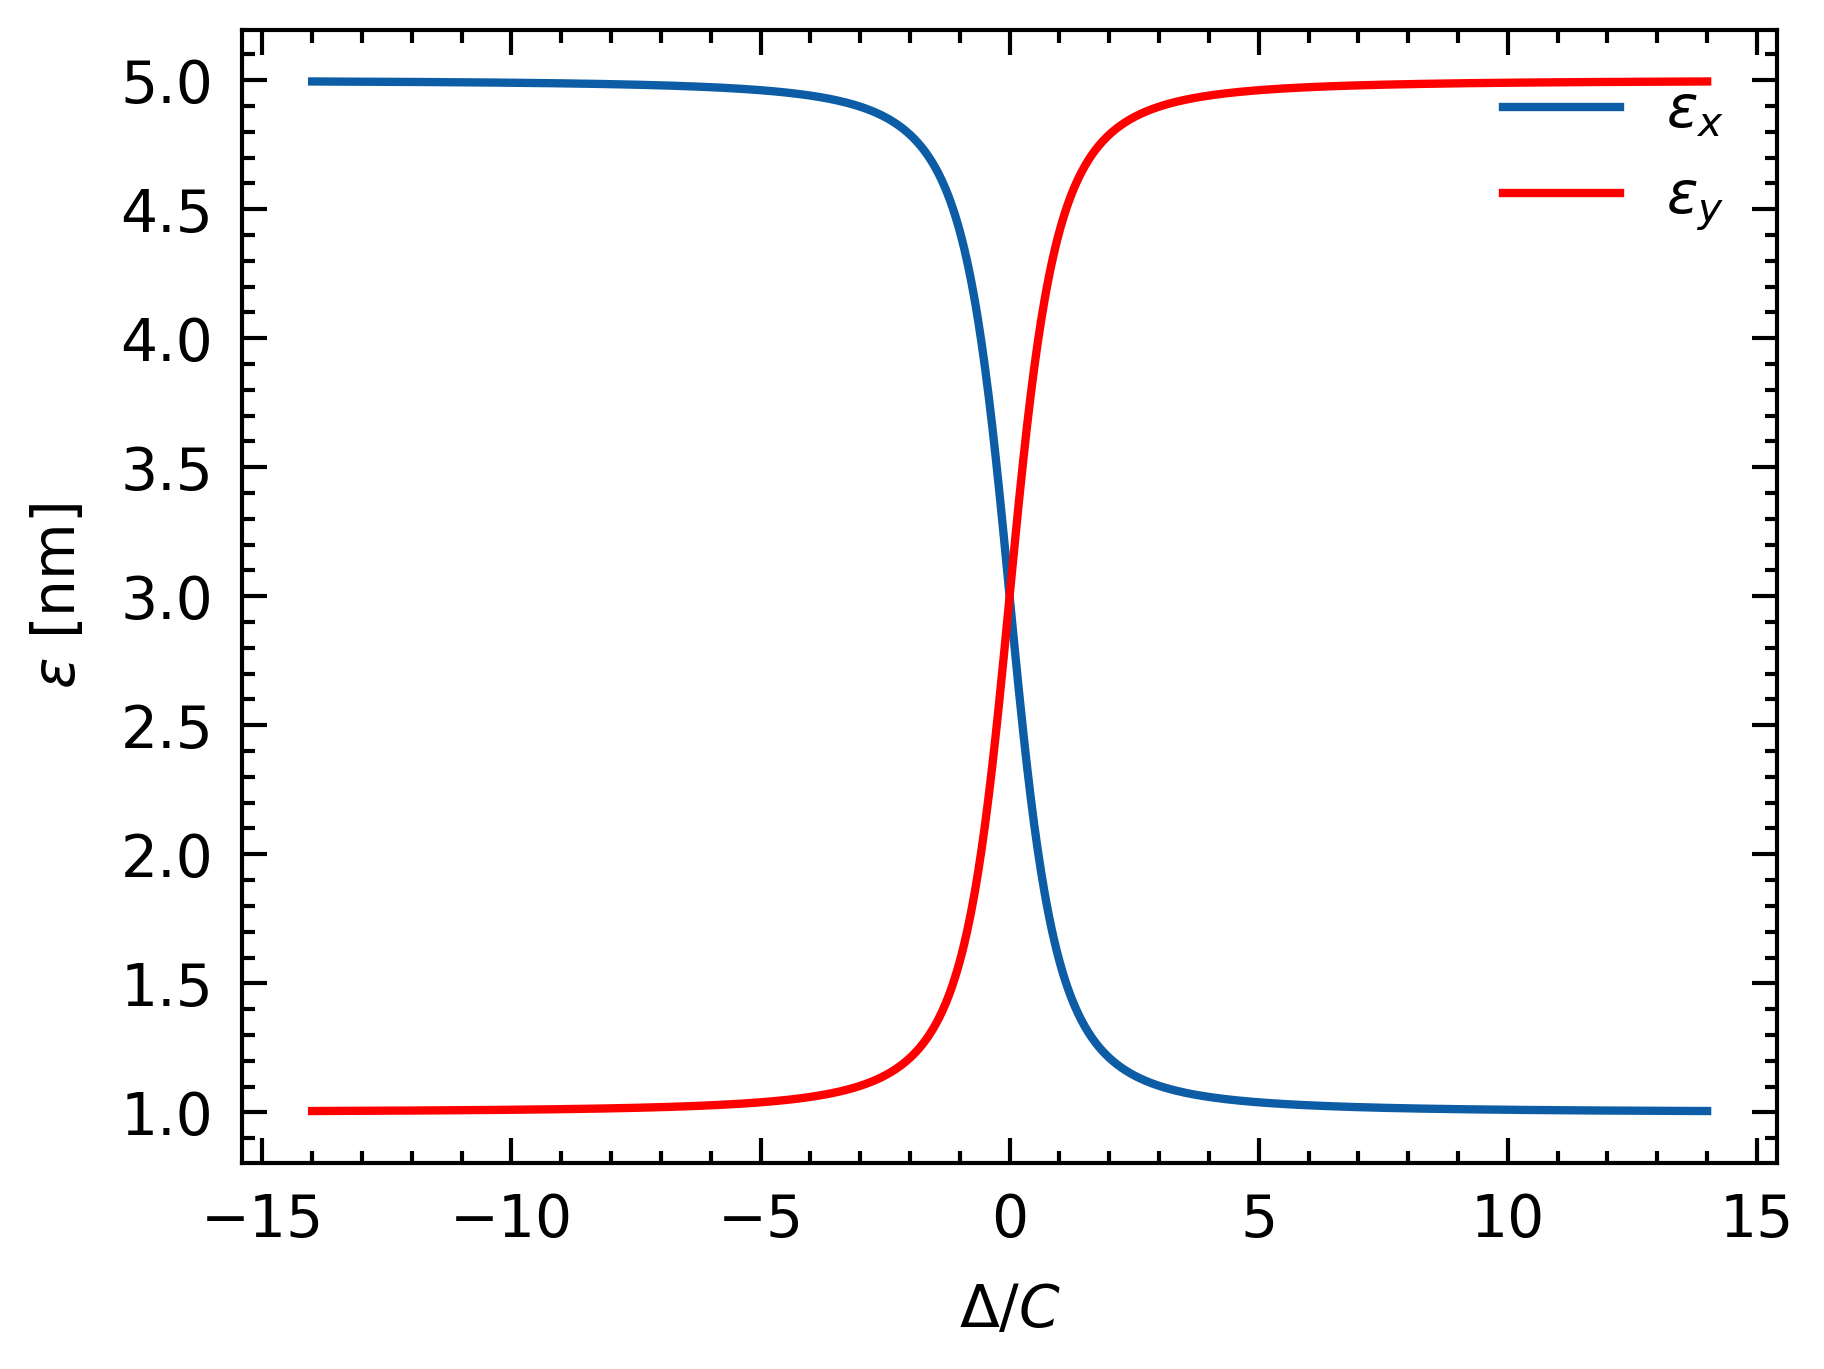

In [67]:
plt.style.use(['science', 'no-latex', 'nature'])
C = 0.05
delta1 = np.linspace(-0.7,0,num=600)
delta2 = np.linspace(0,0.7,num=600)

delta = np.concatenate([delta1,delta2])
emitx0 = 5
emity0 = 1

emitx1 = emitx0 + C**2/(delta1**2 + C**2 + np.abs(delta1)*np.sqrt(delta1**2 + C**2)) * (emity0 - emitx0)/2
emitx2 = emitx0 + C**2/(delta2**2 + C**2 - np.abs(delta2)*np.sqrt(delta2**2 + C**2)) * (emity0 - emitx0)/2

emitx = np.concatenate([emitx1, emitx2])

emity1 = emity0 - C**2/(delta1**2 + C**2 + np.abs(delta1)*np.sqrt(delta1**2 + C**2)) * (emity0 - emitx0)/2
emity2 = emity0 - C**2/(delta2**2 + C**2 - np.abs(delta2)*np.sqrt(delta2**2 + C**2)) * (emity0 - emitx0)/2

emity = np.concatenate([emity1, emity2])

plt.plot(delta/C, emitx, label="$\epsilon_x$")
plt.plot(delta/C, emity, label="$\epsilon_y$", c='r')
plt.legend(loc="upper right")
plt.xlabel('$\Delta/C$')
plt.ylabel("$\epsilon$ [nm]")